In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class SMABacktester:
    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None
        self.get_data()
    
    def get_data(self):
        """Download stock data and compute returns + SMAs."""
        df = yf.download(self.symbol, start=self.start, end=self.end)
        data = df[["Close"]].copy()
        
        # log returns
        data["returns"] = np.log(data["Close"] / data["Close"].shift(1))
        
        # short and long moving averages
        data["SMA_S"] = data["Close"].rolling(self.SMA_S).mean()
        data["SMA_L"] = data["Close"].rolling(self.SMA_L).mean()
        
        data.dropna(inplace=True)
        self.data2 = data
        return data
    
    def test_results(self):
        """Backtest SMA strategy, compute cumulative returns + outperformance."""
        data = self.data2.copy().dropna()
        
        # trading position
        data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
        
        # strategy returns
        data["strategy"] = data["returns"] * data["position"].shift(1)
        data.dropna(inplace=True)
        
        # cumulative returns
        data["returnsbh"] = data["returns"].cumsum().apply(np.exp)            
        data["returnsstrategy"] = data["strategy"].cumsum().apply(np.exp)     
        
        perf = data["returnsstrategy"].iloc[-1]
        outperf = perf - data["returnsbh"].iloc[-1]
        
        self.results = data
        return round(perf, 6), round(outperf, 6)
    
    def plot_results(self):
        """Plot cumulative returns of strategy vs buy & hold."""
        if self.results is None:
            print("Run test_results() first.")
        else:
            title = "{} | SMA_S={} | SMA_L={}".format(self.symbol, self.SMA_S, self.SMA_L)
            self.results[["returnsbh", "returnsstrategy"]].plot(title=title, figsize=(12,8))
            plt.show()
    
    def optimize_parameters(self, short_range, long_range):
        """Try different SMA short/long combos and find best performance."""
        best_perf = -np.inf
        best_params = None
        
        for SMA_S in short_range:
            for SMA_L in long_range:
                if SMA_S >= SMA_L:  # short SMA must be < long SMA
                    continue
                # compute strategy
                self.SMA_S, self.SMA_L = SMA_S, SMA_L
                self.get_data()
                perf, _ = self.test_results()
                if perf > best_perf:
                    best_perf = perf
                    best_params = (SMA_S, SMA_L)
        
        print(f"Best Performance: {best_perf:.4f} | Best Parameters: SMA_S={best_params[0]}, SMA_L={best_params[1]}")
        self.SMA_S, self.SMA_L = best_params  # reset to best
        self.get_data()
        self.test_results()
        return best_params, best_perf

/var/folders/y6/j147rr5d0zj84btmgdl3_dlh0000gn/T/ipykernel_37841/3428425636.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(self.symbol, start=self.start, end=self.end)
[*********************100%***********************]  1 of 1 completed
/var/folders/y6/j147rr5d0zj84btmgdl3_dlh0000gn/T/ipykernel_37841/3428425636.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(self.symbol, start=self.start, end=self.end)
[*********************100%***********************]  1 of 1 completed
/var/folders/y6/j147rr5d0zj84btmgdl3_dlh0000gn/T/ipykernel_37841/3428425636.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(self.symbol, start=self.start, end=self.end)
[*********************100%***********************]  1 of 1 completed
/var/folders/y6/j147rr5d0zj84btmgdl3_dlh0000gn/T/ipykernel_37841/3428425636.py:18: FutureWarning: YF.download() has ch

Strategy Return: 5.952486, Outperformance: 2.589286


[*********************100%***********************]  1 of 1 completed
/var/folders/y6/j147rr5d0zj84btmgdl3_dlh0000gn/T/ipykernel_37841/3428425636.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(self.symbol, start=self.start, end=self.end)
[*********************100%***********************]  1 of 1 completed
/var/folders/y6/j147rr5d0zj84btmgdl3_dlh0000gn/T/ipykernel_37841/3428425636.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(self.symbol, start=self.start, end=self.end)
[*********************100%***********************]  1 of 1 completed
/var/folders/y6/j147rr5d0zj84btmgdl3_dlh0000gn/T/ipykernel_37841/3428425636.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(self.symbol, start=self.start, end=self.end)
[*********************100%***********************]  1 of 1 completed
/var/folders/y6/j147rr5d0zj84btmgdl3_dlh0000gn/T/

Best Performance: 7.5283 | Best Parameters: SMA_S=30, SMA_L=225
Best params: (30, 225)  | Best performance: 7.528293


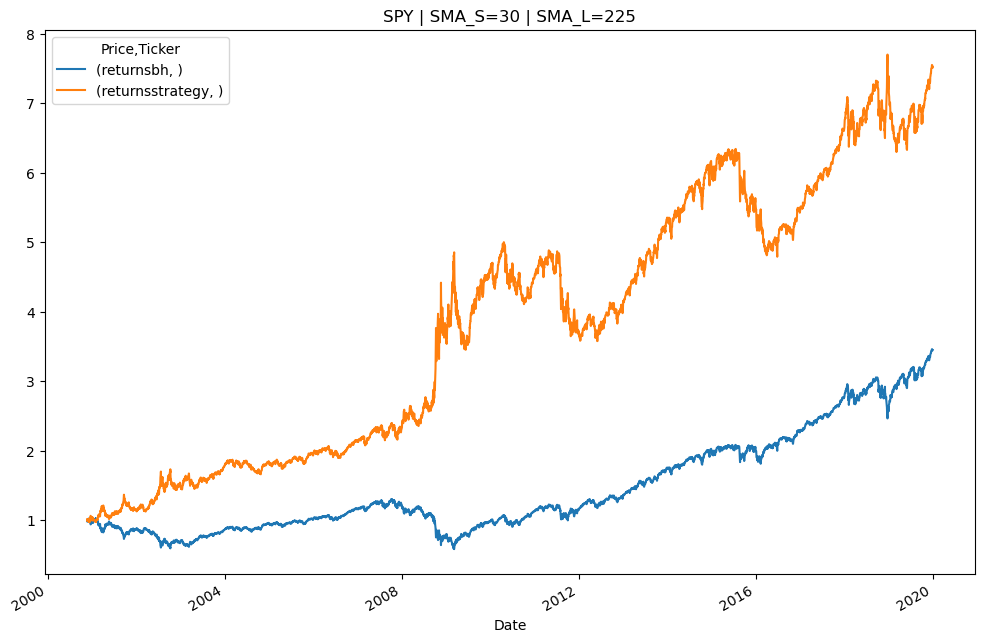

In [2]:
bt = SMABacktester("SPY", SMA_S=50, SMA_L=200, start="2000-01-01", end="2020-01-01")

# Run backtest
perf, outperf = bt.test_results()
print(f"Strategy Return: {perf}, Outperformance: {outperf}")

# Optimize parameters (search short SMA 20–60, long SMA 150–250)
best_params, best_perf = bt.optimize_parameters(range(20,61,10), range(150,251,25))

print("Best params:", best_params, " | Best performance:", best_perf)

# Plot results for best params
bt.plot_results()